In [42]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [43]:
crimes = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e")
crimeByHood = crimes["INCIDENTNEIGHBORHOOD"]
numCrimes = crimeByHood.value_counts().rename_axis('Neighborhood').reset_index(name='Number of Crimes')
numCrimes.head()

,Neighborhood,Number of Crimes
0,South Side Flats,15157
1,Central Business District,13565
2,Carrick,9213
3,Bloomfield,7079
4,Shadyside,6776


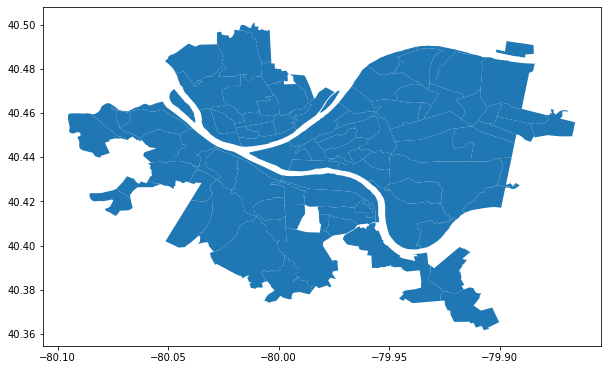

In [44]:
neighborhoods = gpd.read_file("Neighborhoods_.shp")
neighborhoods.plot(figsize = (10,10))
neighborhoods = neighborhoods[["hood", "geometry"]]

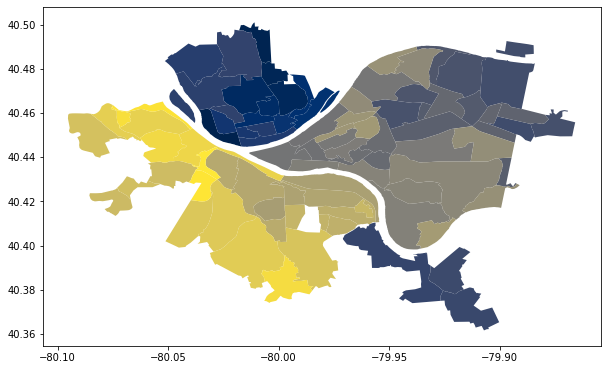

In [45]:
numCrimes.replace("Mt. Oliver Neighborhood", "Mt. Oliver", inplace = True)
for index, row in neighborhoods["hood"].iteritems():
    if row in numCrimes['Neighborhood'].tolist():
        pass
    else:
        print(row + " not in crime data set")
    #crime.replace("Mt. Oliver Neighborhood", "Mt. Oliver", inplace = True)
neighborhoods.plot(figsize = (10,10), cmap = "cividis", legend = True)

In [46]:
#creating the percentages of the crimes compared to the neighborhood with the most crime (south side flats)
crimeMax = 15147
numCrimes["Percentage of Crimes"] = ""
percent = 0.0
for row in numCrimes.iterrows():
    percent = float(row[1][1])/crimeMax
    numCrimes['Percentage of Crimes'][row[0]] = percent
numCrimes.sort_values(by='Percentage of Crimes', ascending = True)
numCrimes.tail(20)
#these are the top 20 communities with the least number of crimes

<ipython-input-46-d09256d045c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numCrimes['Percentage of Crimes'][row[0]] = percent


,Neighborhood,Number of Crimes,Percentage of Crimes
78,Fairywood,616,0.0406681
79,St. Clair,600,0.0396118
80,Glen Hazel,585,0.0386215
81,Esplen,510,0.03367
82,Oakwood,492,0.0324817
83,Hays,452,0.0298409
84,Regent Square,443,0.0292467
85,Summer Hill,421,0.0277943
86,Mount Oliver,412,0.0272001
87,Arlington Heights,408,0.026936


In [47]:
# merging the two lists
neighborhoods = neighborhoods.rename(columns={"hood": "Neighborhood"})
CrimeHoodMerged = neighborhoods.merge(numCrimes)
CrimeHoodMerged

,Neighborhood,geometry,Number of Crimes,Percentage of Crimes
0,Chateau,"POLYGON ((-80.02999 40.45909, -80.02989 40.458...",1995,0.131709
1,Summer Hill,"POLYGON ((-80.01078 40.49975, -80.01073 40.499...",421,0.0277943
2,Northview Heights,"POLYGON ((-80.00327 40.48271, -80.00325 40.482...",2112,0.139434
3,Spring Hill-City View,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",1939,0.128012
4,Perry South,"POLYGON ((-80.01422 40.47745, -80.01435 40.477...",3186,0.210339
...,...,...,...,...
85,Overbrook,"POLYGON ((-79.99633 40.39458, -79.99630 40.394...",1748,0.115402
86,Chartiers City,"POLYGON ((-80.06919 40.46046, -80.06912 40.460...",246,0.0162408
87,Esplen,"POLYGON ((-80.05154 40.46364, -80.05140 40.463...",510,0.03367
88,Ridgemont,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",260,0.0171651


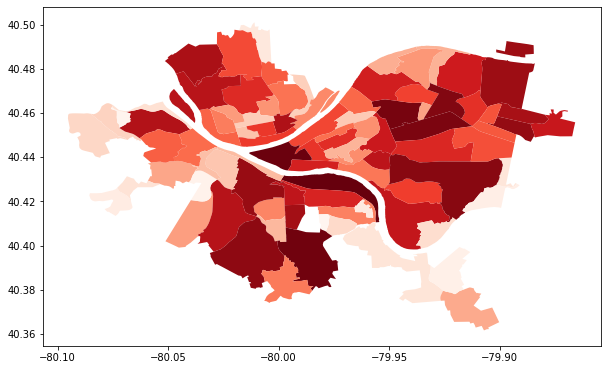

In [48]:
#plotting the map
CrimeHoodMerged.plot(column = 'Percentage of Crimes', figsize = (10,10), cmap = "Reds", legend = False)

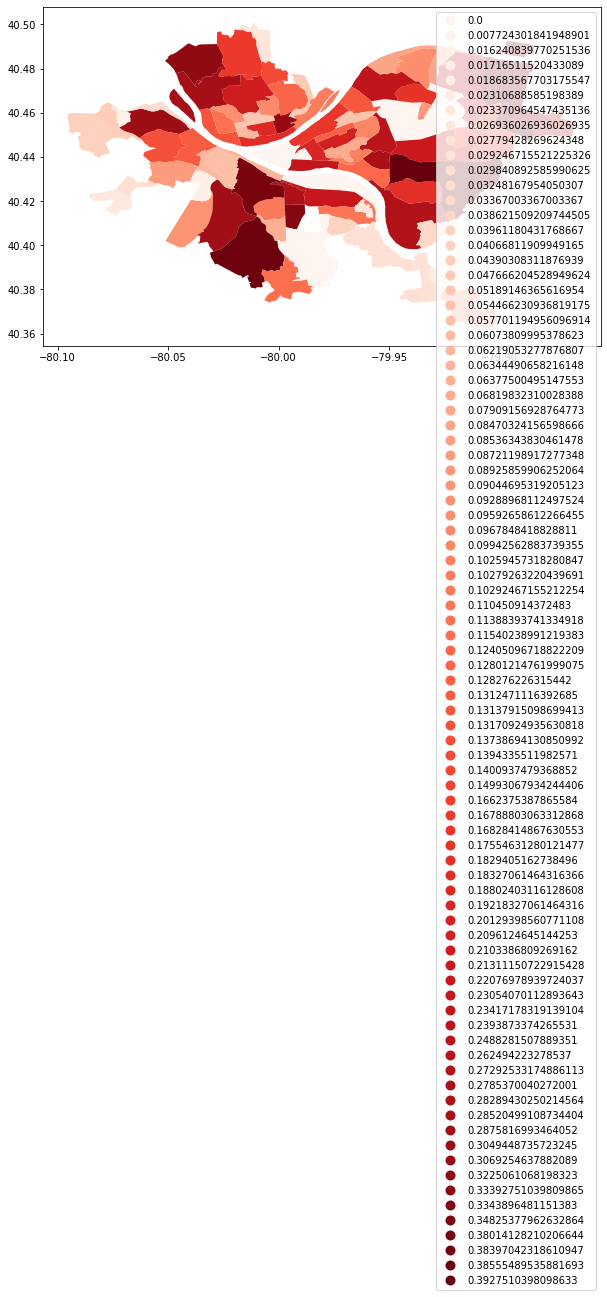

In [52]:
for row in CrimeHoodMerged.iterrows():
    if row[1][3]>0.4:
        CrimeHoodMerged['Percentage of Crimes'][row[0]] = 0
        print(CrimeHoodMerged['Percentage of Crimes'][row[0]])
CrimeHoodMerged.plot(column = 'Percentage of Crimes', figsize = (10,10), cmap = "Reds", legend = True)